In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# place the zip file in this path of google drive, which is the home page of google drive, change if path is different
# No need to change any other code hereafter

!unzip /content/drive/MyDrive/sign_data.zip

Archive:  /content/drive/MyDrive/sign_data.zip
   creating: sign_data/
   creating: sign_data/sign_data/
   creating: sign_data/sign_data/test/
   creating: sign_data/sign_data/test/049/
 extracting: sign_data/sign_data/test/049/01_049.png  
 extracting: sign_data/sign_data/test/049/02_049.png  
 extracting: sign_data/sign_data/test/049/03_049.png  
 extracting: sign_data/sign_data/test/049/04_049.png  
 extracting: sign_data/sign_data/test/049/05_049.png  
 extracting: sign_data/sign_data/test/049/06_049.png  
 extracting: sign_data/sign_data/test/049/07_049.png  
 extracting: sign_data/sign_data/test/049/08_049.png  
 extracting: sign_data/sign_data/test/049/09_049.png  
 extracting: sign_data/sign_data/test/049/10_049.png  
 extracting: sign_data/sign_data/test/049/11_049.png  
 extracting: sign_data/sign_data/test/049/12_049.png  
   creating: sign_data/sign_data/test/049_forg/
 extracting: sign_data/sign_data/test/049_forg/01_0114049.PNG  
 extracting: sign_data/sign_data/test/049

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

In [4]:
pwd

'/content'

In [5]:
train_dir="/content/sign_data/train"
train_csv="/content/sign_data/train_data.csv"
test_csv="/content/sign_data/test_data.csv"
test_dir="/content/sign_data/test"

In [6]:
df_train=pd.read_csv(train_csv)
df_train.head()

,068/09_068.png,068_forg/03_0113068.PNG,1
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1


In [7]:
df_test = pd.read_csv(test_csv)
df_test.head()

,068/09_068.png,068_forg/03_0113068.PNG,1
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1


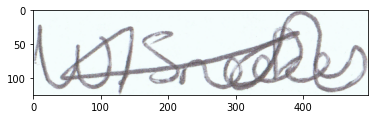

In [12]:
import matplotlib.pyplot as plt
img = plt.imread(train_dir+"/"+(df_train.iat[1,0]))#.replace("/", "\\"))
plt.imshow(img)

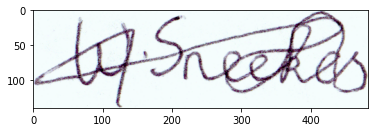

In [14]:
import matplotlib.pyplot as plt
img = plt.imread(train_dir+"/"+df_train.iat[1,1])#.replace("/", "\\"))
plt.imshow(img)

In [17]:
import cv2
test_images1 = []
test_images2 = []
for j in range(0,len(df_test)):
    img1 = cv2.imread(test_dir+"/"+df_test.iat[j,0])
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.resize(img1, (100, 100))
    test_images1.append(img1)
    
    img2 = cv2.imread(test_dir+"/"+df_test.iat[j,1])
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2 = cv2.resize(img2, (100, 100))
    test_images2.append(img2)

test_images1 = np.array(test_images1)/255.0
test_images2 = np.array(test_images2)/255.0

In [18]:
import cv2

train_images1 = []
train_images2 = []
train_labels = []

for i in range(len(df_train)):
    img1 = cv2.imread(train_dir+"/"+df_train.iat[i,0])
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.resize(img1, (100, 100))
    train_images1.append(img1)
    
    img2 = cv2.imread(train_dir+"/"+df_train.iat[i,1])
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2 = cv2.resize(img2, (100, 100))
    train_images2.append(img2)
    
    train_labels.append(df_train.iat[i,2])
    
train_images1 = np.array(train_images1)/255.0
train_images2 = np.array(train_images2)/255.0
train_labels = np.array(train_labels)

In [19]:
train_images1 = np.expand_dims(train_images1, -1)
train_images2 = np.expand_dims(train_images2, -1)
test_images1 = np.expand_dims(test_images1, -1)
test_images2 = np.expand_dims(test_images2, -1)

In [20]:
from keras import backend as K
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

# def contrastive_loss(y_true, y_pred):
#     margin = 1
#     return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

# def accuracy(y_true, y_pred):
#     '''Compute classification accuracy with a fixed threshold on distances.
#     '''
#     return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [21]:
input_dim = (100,100,1)

In [22]:
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras import optimizers

from keras import callbacks
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
import os
from keras.models import Model,load_model
import json
from keras.models import model_from_json, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import warnings
warnings.filterwarnings('ignore')

In [23]:
def build_base_network(input_shape):
    
    seq = Sequential()
    
    kernel_size = 3
    
    #convolutional layer 1
    seq.add(Convolution2D(64, (kernel_size, kernel_size), input_shape=input_shape))
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2, 2)))  
    seq.add(Dropout(.25))
    
    seq.add(Convolution2D(32, (kernel_size, kernel_size)))
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2, 2))) 
    seq.add(Dropout(.25))
    
    #convolutional layer 2
    seq.add(Convolution2D(32, (kernel_size, kernel_size)))
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2, 2))) 
    seq.add(Dropout(.25))

    #flatten 
    seq.add(Flatten())
    seq.add(Dense(128, activation='relu'))
    seq.add(Dropout(0.1))
    seq.add(Dense(50, activation='relu'))
    return seq

base_network = build_base_network(input_dim)

img_a = Input(shape=input_dim)
img_b = Input(shape=input_dim)

feat_vecs_a = base_network(img_a)
feat_vecs_b = base_network(img_b)

distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([feat_vecs_a, feat_vecs_b])

prediction = Dense(1,activation='sigmoid')(distance)

In [24]:
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]

In [25]:
model = Model([img_a, img_b],prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 50)           444530      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           sequential[0][0]             

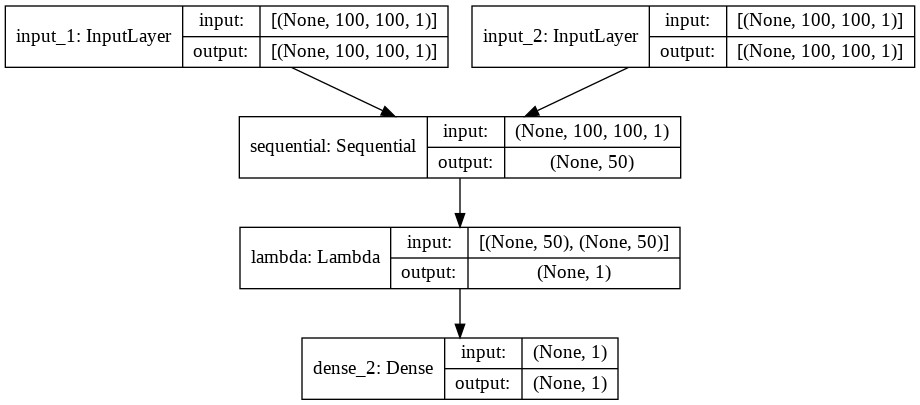

In [26]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [28]:
model_hist = model.fit([train_images1,train_images2], train_labels, validation_split=.10,
      batch_size= 32, verbose=1, epochs=5, callbacks=callback_early_stop_reduceLROnPlateau)

Epoch 1/5
653/653 [==============================] - 19s 18ms/step - loss: 0.7070 - accuracy: 0.4782 - val_loss: 0.6929 - val_accuracy: 0.5118
Epoch 2/5
653/653 [==============================] - 11s 17ms/step - loss: 0.6918 - accuracy: 0.5410 - val_loss: 0.6929 - val_accuracy: 0.5118
Epoch 3/5
653/653 [==============================] - 11s 17ms/step - loss: 0.6911 - accuracy: 0.5416 - val_loss: 0.6930 - val_accuracy: 0.5118
Epoch 4/5
653/653 [==============================] - 11s 17ms/step - loss: 0.6900 - accuracy: 0.5498 - val_loss: 0.6931 - val_accuracy: 0.5118
Epoch 5/5
653/653 [==============================] - 11s 17ms/step - loss: 0.6909 - accuracy: 0.5357 - val_loss: 0.6933 - val_accuracy: 0.5118
Epoch 00005: early stopping


In [29]:
pred_y = model.predict([test_images1,test_images2])

In [30]:
test_labels = np.array(df_test['1'])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_y.argmax(axis=1), test_labels)

0.4823386114494519